## Titanic Tutorial 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

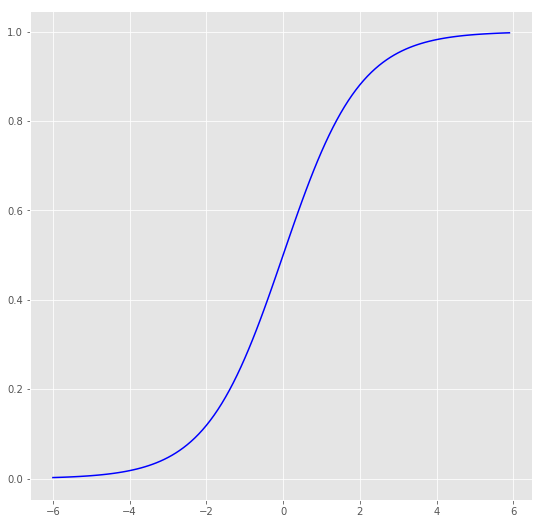

In [3]:
plt.figure(figsize=(9,9))

def sigmoid(t):                          # Define the sigmoid function
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(-6, 6, 0.1)       

y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

In [4]:
import os

In [5]:
os.chdir('C:\\Users\\Claudine Gachiri\\Desktop\\School\\IT UNITS\\ARTIFICIAL NEURAL NETWORKS AND PATTERN RECOGNITION') # Set working directory

titanic_train = pd.read_csv("train data.csv")    # Read the data

char_cabin = titanic_train["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [6]:
from sklearn import linear_model
from sklearn import preprocessing

In [7]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[1.01628767]
[[-2.44597988]]


In [8]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]

# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds.loc[:, "Survival_prob"])

Survival_prob,0.19314664603456397,0.7342488525817924
Sex,,
female,0,314
male,577,0


In [9]:
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[3.85818122]
[[-0.93272694 -0.09865307 -2.51826528 -0.03339524]]


In [10]:
# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
row_0,,
0,458,89
1,91,253


In [11]:
(458+253)/891

0.797979797979798

In [12]:
log_model.score(X = train_features,
                y = titanic_train["Survived"])

0.797979797979798

In [13]:
from sklearn import metrics

In [14]:
# View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds) # Predicted labels

array([[458,  91],
       [ 89, 253]], dtype=int64)

In [15]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                              y_pred=preds) )

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       549
           1       0.74      0.74      0.74       342

   micro avg       0.80      0.80      0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [16]:
# Read and prepare test data
titanic_test = pd.read_csv("test data.csv")    # Read the data

char_cabin = titanic_test["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

titanic_test["Age"] = new_age_var 

In [17]:
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

In [18]:
# Make test on set predictions
test_preds = log_model.predict(X=test_features)

# Creating a file to store the predicted values for the test data
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save file to CSV
submission.to_csv("logreg_submission.csv", 
                  index=False)        # Do not save index values

## Questions

### Number 1

In [19]:
#The sigmoid function in In[3] takes a value t
#The t in this case is a range of values between -6 and 6 with a step of 0.1
#For each t-value,a corresponding y-value is gotten from the general sigmoid function as is defined in the user-defined function sigmoid
#A sigmoid curve is then plotted using the range(-6 to 6) as the values on the x-axis
#and the y-values as the predicted y-values.

### Number 2

In [20]:
#A sigmoid function outputs a probability greater than 0.5 if the t-values are positives.
#This therefore means that the coefficients of x in the y=B0x+B1x+BNx... +c are all positives.

### Number 3

In [21]:
#a.
# The missing values in the column age in this tutorial are replaced by the median of the column which is 24.
#This means all the null values now read 24 as seen in In[5]

In [22]:
#b.
titanic_train["Age"].fillna(titanic_train["Age"].median() , inplace = True) 

### Number 4

In [23]:
# Sklearn's machine learning functions don't directly allow features to be categorical.
#It in turn has different functions that convert the categorical values to numerical data which is easier to work with. 

### Number 5

In [24]:
#a.
#Label-encoding is important as it helps us encode categorical values like gender into numerica values .
#This is important as it is easier to analyze numerical values than it is to analyze categorical values.

In [25]:
#b.
#In the tutorial Label-encoding has been achieved on line In[7]
#Using the function LabelEncoder imported from the Sklearn Library, a variable encoded_sex is intialized.
#The variable stores a transformed column "sex" into numerical values using the fit_transform function under the LabelEncoder function.

In [26]:
#c.
#Another way encoding could be done is OneHot Encoding.
#This method of encoding trys to deal with the issue that happens with Label-Encoding.
# Label-Encoding gives the model some kind of thinking that there is hierachical order in the transformed column while there is non.
#For this reason OneHot-Encoding, takes the column with categorical data that has already been label encoded and splits the columns into the categorical values present.
#It then indicates 1 or 0 depending on what the column had.
#Example: for Sex i.e Male or Female, they will be two new columns which will be male and gemale and for every row that is female then under female value will be 1 and 0 for male for the same row and vice versa.

### Number 6

#The logistic regression model learned was:
#### y= 3.29559054 - 0.93337465x1 - 0.06151651x2 - 2.42710335x3 -  0.02679381x4 


### Number 7

In [27]:
#The function predict() is used to get the classes of the predict column.
#In this case for example the function will give: Male and Female for the column Sex which was the y-value(dependent value)
#The function predict_proba() on the other hand is used to give the probabilities of the predictions for the predicted classes.
#In this  case the survival probabilities for Male= 19% and Female =73% as seen in Out[8]

### Number 8

In [28]:
#a.
#Confusion_matrix  is an output in form of a matrix.
#The matrix gives an analysis of the classification of the predict values vs the original or true values.
#The output is the general performance of the model in terms of the True Positives, True Negatives, False Positives and False Negatives.
#Using the matrix, accuracy is given by True Positives +False Negatives divide by the total number of samples.

In [29]:
#b.
#The confusion matrix of this model as seen in Out[10] shows that the model predicted:
#Column 0 , row 0 shows that 467 people survived and they did not survive(True -s)
#Column 0 , row 1 shows that 103 people did not survive but they actually did survive(False -s) 
#Column 1,row 0 shows that 82 people who survived but they actually did not survive.(False +s)
#Column 1, row 1 shows that 237 people survived and they actually did.(True +s)